# Mapping a QFT circuit to a tensor network

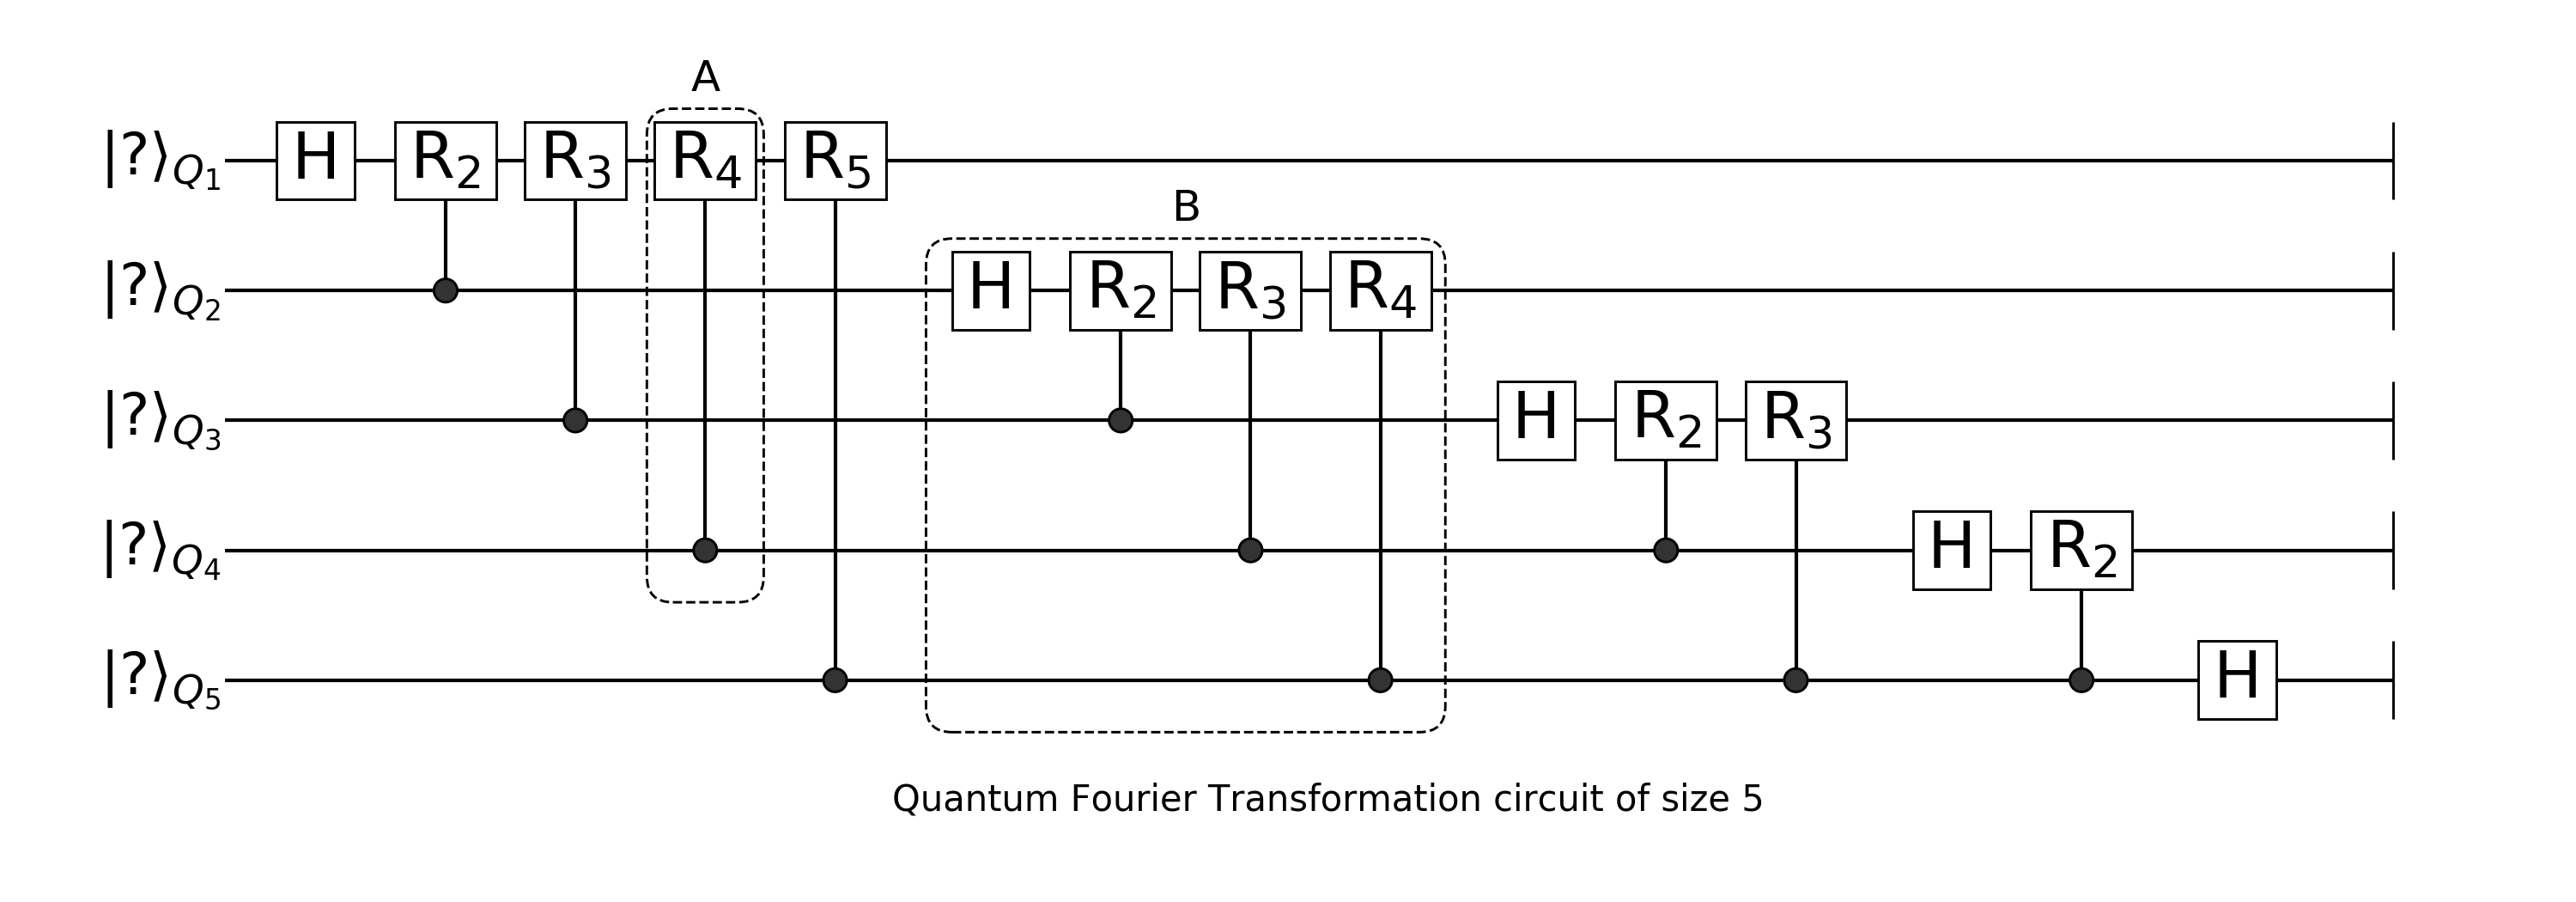

In [1]:
using Yao, TensorOperations

In [2]:
CRk(i::Int, j::Int, k::Int) = control([i, ], j=>shift(2π/(1<<k)))
CRot(n::Int, i::Int) = chain(n, i==j ? kron(i=>H) : CRk(j, i, j-i+1) for j = i:n)
QFTCircuit(n::Int) = chain(n, CRot(n, i) for i = 1:n)

qft = QFTCircuit(5)

nqubits: 5, datatype: Complex{Float64}
chain
├─ chain
│  ├─ kron
│  │  └─ 1=>H gate
│  ├─ control(2)
│  │  └─ (1,) shift(1.5707963267948966)
│  ├─ control(3)
│  │  └─ (1,) shift(0.7853981633974483)
│  ├─ control(4)
│  │  └─ (1,) shift(0.39269908169872414)
│  └─ control(5)
│     └─ (1,) shift(0.19634954084936207)
├─ chain
│  ├─ kron
│  │  └─ 2=>H gate
│  ├─ control(3)
│  │  └─ (2,) shift(1.5707963267948966)
│  ├─ control(4)
│  │  └─ (2,) shift(0.7853981633974483)
│  └─ control(5)
│     └─ (2,) shift(0.39269908169872414)
├─ chain
│  ├─ kron
│  │  └─ 3=>H gate
│  ├─ control(4)
│  │  └─ (3,) shift(1.5707963267948966)
│  └─ control(5)
│     └─ (3,) shift(0.7853981633974483)
├─ chain
│  ├─ kron
│  │  └─ 4=>H gate
│  └─ control(5)
│     └─ (4,) shift(1.5707963267948966)
└─ chain
   └─ kron
      └─ 5=>H gate


In [3]:
iqft = qft'

nqubits: 5, datatype: Complex{Float64}
chain
├─ chain
│  └─ kron
│     └─ 5=>H gate
├─ chain
│  ├─ control(5)
│  │  └─ (4,) shift(-1.5707963267948966)
│  └─ kron
│     └─ 4=>H gate
├─ chain
│  ├─ control(5)
│  │  └─ (3,) shift(-0.7853981633974483)
│  ├─ control(4)
│  │  └─ (3,) shift(-1.5707963267948966)
│  └─ kron
│     └─ 3=>H gate
├─ chain
│  ├─ control(5)
│  │  └─ (2,) shift(-0.39269908169872414)
│  ├─ control(4)
│  │  └─ (2,) shift(-0.7853981633974483)
│  ├─ control(3)
│  │  └─ (2,) shift(-1.5707963267948966)
│  └─ kron
│     └─ 2=>H gate
└─ chain
   ├─ control(5)
   │  └─ (1,) shift(-0.19634954084936207)
   ├─ control(4)
   │  └─ (1,) shift(-0.39269908169872414)
   ├─ control(3)
   │  └─ (1,) shift(-0.7853981633974483)
   ├─ control(2)
   │  └─ (1,) shift(-1.5707963267948966)
   └─ kron
      └─ 1=>H gate


In [4]:
reg = rand_state(5)
copy(reg) |> qft |> iqft ≈ reg

true

In [5]:
TR(k::Int) = [1 1; 1 exp(2im*π/(1<<k))]
function D(dim::Int)
    ts = zeros(fill(2,dim)...)
    ts[1] = 1
    ts[end] = 1
    ts
end
TH = mat(H);

In [6]:
TR2 = TR(2)
TR3 = TR(3)
TR4 = TR(4)
TR5 = TR(5)
δ3 = D(3);
δ4 = D(4);
δ5 = D(5);
δ6 = D(6);

In [7]:
using TensorOperations

In [8]:
reg = rand_state(5);
res = copy(reg) |> qft
ψ = dropdims(reg |> hypercubic, dims=6)

2×2×2×2×2 Array{Complex{Float64},5}:
[:, :, 1, 1, 1] =
 -0.0670093+0.0364454im   0.170814+0.165133im
 -0.0906899-0.177187im   -0.223706-0.061496im

[:, :, 2, 1, 1] =
 -0.0118792+0.195459im  0.0175766+0.0498172im
   -0.12495-0.114425im  0.0858017+0.0994832im

[:, :, 1, 2, 1] =
  0.149414+0.0332035im  -0.0656337+0.0416646im 
 0.0330133-0.121187im     0.132801+0.00427736im

[:, :, 2, 2, 1] =
 -0.0407076+0.189003im    -0.221488+0.0402931im
  -0.112376-0.0103689im  -0.0738843-0.0156608im

[:, :, 1, 1, 2] =
 0.0682118+0.0551958im  0.0237368-0.0642913im
 -0.162153-0.192338im    0.197437-0.333424im 

[:, :, 2, 1, 2] =
  -0.157836+0.0845488im  0.102213+0.0946242im
 -0.0632157-0.253977im   0.103775+0.0704474im

[:, :, 1, 2, 2] =
  -0.114146+0.00715952im   0.054242-0.271339im 
 -0.0130284+0.0677581im   -0.152999+0.0826845im

[:, :, 2, 2, 2] =
 -0.168052+0.121258im      0.20971+0.0272087im
 0.0143029+0.0439577im  -0.0225794+0.106266im 

In [9]:
@tensoropt begin
    out[f,g,h,i,j] :=
    ψ[a,b,c,d,e] * 
    TH[a,f1] * TR2[f2,b1] * TR3[f3,c1] * TR4[f4,d1] * TR5[f5,e1] *
    TH[b2,g1] * TR2[g2,c2] * TR3[g3,d2] * TR4[g4,e2] *
    TH[c3,h1] * TR2[h2,d3] * TR3[h3,e3] *
    TH[d4,i1] * TR2[i2,e4] *
    TH[e5,j] *
    δ3[b2,b1,b] *
    δ4[c3,c2,c1,c] *
    δ5[d4,d3,d2,d1,d] *
    δ6[e5,e4,e3,e2,e1,e] *
    δ3[i2,i1,i] *
    δ4[h3,h2,h1,h] *
    δ5[g4,g3,g2,g1,g] *
    δ6[f5,f4,f3,f2,f1,f]
end

2×2×2×2×2 Array{Complex{Float64},5}:
[:, :, 1, 1, 1] =
 -0.0925047+3.44013e-5im   0.010636-0.130391im 
  -0.142181+0.228533im    0.0420297-0.0540839im

[:, :, 2, 1, 1] =
   0.180117+0.0467359im   -0.145626-0.0910755im
 -0.0729232+0.132661im   -0.0691002+0.230803im 

[:, :, 1, 2, 1] =
   0.120029+0.059525im   0.0102496-0.0759949im
 -0.0421712+0.11784im   -0.0319574-0.0874927im

[:, :, 2, 2, 1] =
 -0.00701406-0.170544im  -0.0708301-0.265517im 
  -0.0490421+0.167842im    0.198617-0.0876618im

[:, :, 1, 1, 2] =
 -0.0640854+0.125284im   -0.0353314-0.0485299im
  0.0676824+0.0960205im   -0.153091-0.121179im 

[:, :, 2, 1, 2] =
 -0.156017+0.105508im   0.0861731+0.22597im 
 0.0367345+0.0278054im  0.0394024-0.315778im

[:, :, 1, 2, 2] =
  -0.136003-0.0482096im  -0.0113925-0.0877371im
 -0.0662972+0.189832im    0.0992574-0.0225037im

[:, :, 2, 2, 2] =
  -0.142344-0.170808im  0.0079015+0.127674im
 -0.0188139-0.100479im   0.228833+0.202083im

In [10]:
statevec(res) ≈ vec(out)

true

# Call for Treewidth algorithm in Julia!